In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd
from cassL import camb_interface as ci

In [2]:
import importlib.util
import sys

spec = importlib.util.spec_from_file_location(
    "andreap", "../emulator/andreap.py")
andreap = importlib.util.module_from_spec(spec)
sys.modules["andreap"] = andreap
spec.loader.exec_module(andreap)

In [3]:
omega_index = 1 # while we debug, we confine our attention to just one value
omnuh2_float = ci.OMNUH2_FLOATS[omega_index]
omnuh2_str = ci.OMNUH2_STRS[omega_index]

In [4]:
# Axe the 0.01 value since Ariel has not tested that one in the shared results
powernu3 = ci.load_benchmark(
    "power_nu3/Aletheia_powernu3_zorig_nu",
    ["0.0006", "0.0021", "0.0064", "0.0100"] 
)

In [5]:
powernu_i = 0
true_early = powernu3[omnuh2_str][powernu_i][0]
true_late = powernu3[omnuh2_str][powernu_i][4]
# The following construction makes indexing a little easier later.
true = [true_early, None, None, None, true_late]

In [6]:
modeli = 0
model = ci.specify_neutrino_mass(
    ci.cosm.iloc[modeli], omnuh2_float, 1)

MEMNeC = ci.specify_neutrino_mass(
    ci.cosm.iloc[modeli], 0, 0)

In [7]:
# We need a model 0 interpolator with omega_nu = 0.002
p_interpolator = ci.cosmology_to_PK_interpolator(
    model, redshifts=np.flip(np.linspace(0, 2.1, 150)),
    fancy_neutrinos=False, kmax=10, hubble_units=False)
p_MEMNeC_interpolator = ci.cosmology_to_PK_interpolator(
    MEMNeC, redshifts=np.flip(np.linspace(0, 2.1, 150)),
    fancy_neutrinos=False, kmax=10, hubble_units=False)

andrea_interpolator = andreap.cassL_to_andrea_cosmology(
    model, hybrid=True)

The if-statement is behaving as expected.


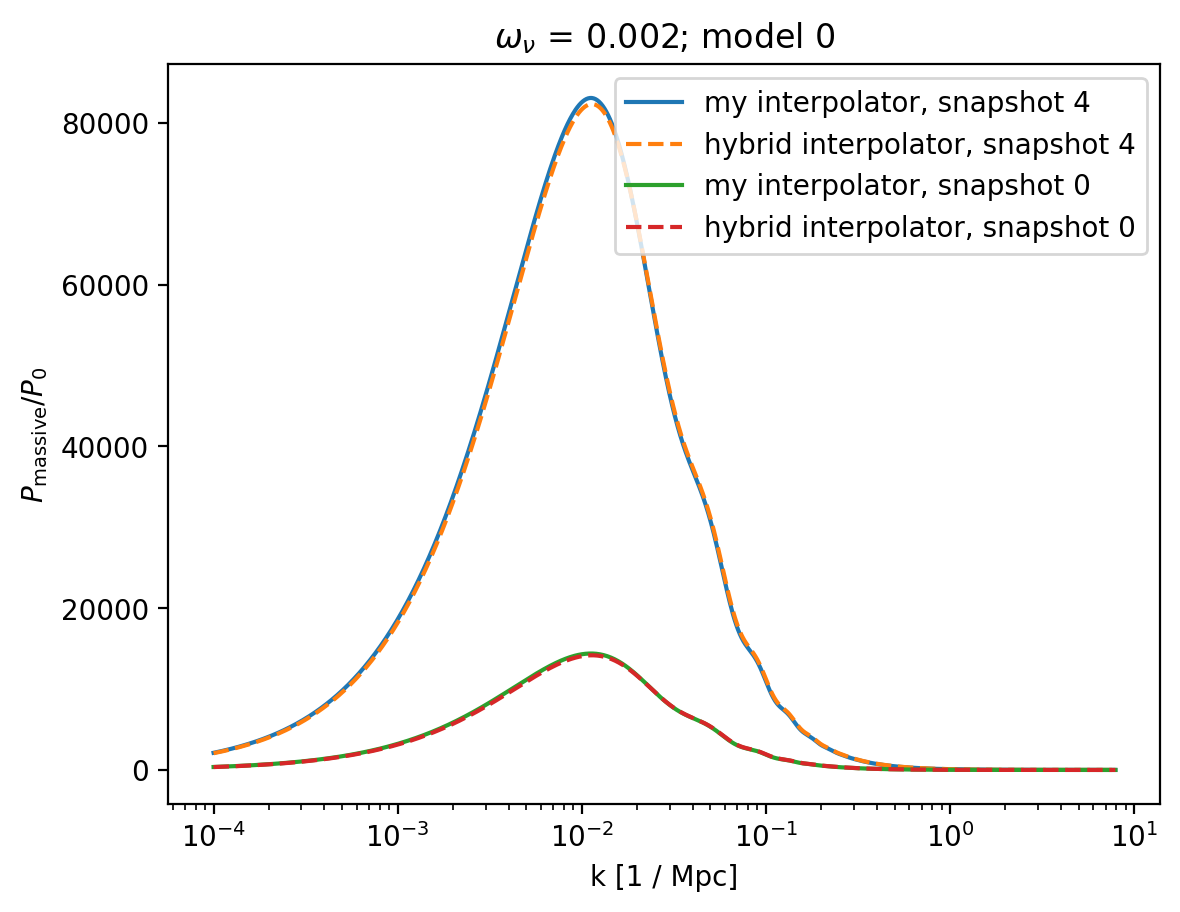

In [9]:
z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

#plt.plot(true[j]["k"], true[j]["P_no"],
#         label="powernu3.tar snapshot 4")
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
plt.plot(true[j]["k"], my_MEMNeC_Pk,
         label="my interpolator, snapshot 4")
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
plt.plot(true[j]["k"], andrea_MEMNeC_Pk,
         label="hybrid interpolator, snapshot 4",
        linestyle='dashed')

j = 0
z = z_list[j]
#plt.plot(true[j]["k"], true[j]["P_no"],
#         label="powernu3.tar snapshot 0")
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
plt.plot(true[j]["k"], my_MEMNeC_Pk,
         label="my interpolator, snapshot 0")
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
plt.plot(true[j]["k"], andrea_MEMNeC_Pk,
         label="hybrid interpolator, snapshot 0",
        linestyle='dashed')

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list
plt.savefig("../plots/camb_debug/interpolator_discrepancy.png")

In [ ]:
def percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(
    z, true[j]["k"])
plt.plot(true[j]["k"],
         percent_error(andrea_MEMNeC_Pk, my_MEMNeC_Pk),
         label="snapshot 4")

j = 0
z = z_list[j]
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(
    z, true[j]["k"])
plt.plot(true[j]["k"],
         percent_error(andrea_MEMNeC_Pk, my_MEMNeC_Pk),
         label="snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
stop

In [ ]:
z_list = ci.parse_redshifts(i)

# best case seems to be i = 0
# worst case seems to be i = 1
i=0
j = 4 # this should be SNAP index, not z index
z = z_list[j]

print(z_list)

plt.plot(true[j]["k"], true[j]["P_nu"],
         label="powernu3.tar snapshot 4")
my_Pk = p_interpolator.P(z, true[j]["k"])
plt.plot(true[j]["k"], my_Pk,
         label="my interpolator, snapshot 4")

j = 0
z = z_list[j]
plt.plot(true[j]["k"], true[j]["P_nu"],
         label="powernu3.tar snapshot 0")
my_Pk = p_interpolator.P(z, true[j]["k"])
print("Redshift is now", z)
plt.plot(true[j]["k"], my_Pk,
         label="my interpolator, snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
z_list = ci.parse_redshifts(i)

# best case seems to be i = 0
# worst case seems to be i = 1
i = 0
j = 4 # this should be SNAP index, not z index
z = z_list[j]

print(z_list)

plt.plot(true[j]["k"], true[j]["ratio"],
         label="powernu3.tar snapshot 4")
my_Pk = p_interpolator.P(z, true[j]["k"])
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
print("Redshift is now", z)
plt.plot(true[j]["k"], my_Pk / my_MEMNeC_Pk,
         label="my interpolator, snapshot 4")

j = 0
z = z_list[j]
plt.plot(true[j]["k"], true[j]["ratio"],
         label="powernu3.tar snapshot 0")
my_Pk = p_interpolator.P(z, true[j]["k"])
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
print("Redshift is now", z)
plt.plot(true[j]["k"], my_Pk / my_MEMNeC_Pk,
         label="my interpolator, snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
# best case seems to be i = 0
# worst case seems to be i = 1
i=0
on_accessor = ci.OMNUH2_FLOATS[1]
h = ci.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)

print(z_list)

spectrum = spectra[on_accessor][i][j]
x_Lukas = spectrum["P_nu"] / spectrum["P_no"]
x_Ariel = true[j]["ratio"]
error = (x_Lukas - x_Ariel) / x_Ariel * 100

plt.plot(spectrum["k"], error, c=ci.colors[i],
    label="z=" + str(z_list[j]))

j = 0
spectrum = spectra[on_accessor][i][j]
x_Lukas = spectrum["P_nu"] / spectrum["P_no"]
x_Ariel = true[j]["ratio"]
error = (x_Lukas - x_Ariel) / x_Ariel * 100

plt.plot(spectrum["k"], error, c="black",
    label="z=" + str(z_list[j]),
    linestyle="dashed")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"% discrepancy between P(k) from Fortran and Python codes")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; otherwise model 0")
plt.legend()

plt.savefig("../plots/camb_interface/accuracy/model0.png")
# This protects other cells by avoiding unintended reuse
del h, j, z_list, spectrum, on_accessor

In [ ]:
# best case seems to be i = 0
# worst case seems to be i = 1
i=0
on_accessor = ci.OMNUH2_FLOATS[1]
h = ci.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)

print(z_list)
spectrum = spectra[on_accessor][i][j]

plt.plot(spectrum["k"], spectrum["P_no"], c=ci.colors[i],
    label="my result for z=" + str(z_list[j]))
plt.plot(true[j]["k"], true[j]["P_no"],
         label="powernu3.tar snapshot 4")
spectrum = spectra[on_accessor][i][j]

plt.plot(spectrum["k"], spectrum["P_no"], c="black",
    label="my result for z=" + str(z_list[j]))
plt.plot(true[j]["k"], true[j]["P_no"],
         label="powernu3.tar snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

In [ ]:
print(spectrum["k"].shape)
print(true[j]["k"].shape)

In [ ]:
# This protects other cells by avoiding unintended reuse
del h, j, z_list, spectrum, on_accessor

In [ ]:
# best case seems to be i = 0
# worst case seems to be i = 1
del i
on_accessor = ci.OMNUH2_FLOATS[1]
i = 1
h = ci.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)
spectrum = spectra[on_accessor][i][j]

plt.plot(true[j]["k"], true[j]["ratio"],
         label="snapshot 4 (z = 0)")
#plt.plot(Lukas_LCDM[0] * model0['h'], Lukas_nuCDM[2][1] / Lukas_LCDM[2][1],
#             label='Lukas direct snap 4'.format(0))
#plt.plot(LCDM['kk'], nuCDM['Pk'][4] / LCDM['Pk'][4],
#             label='Matteo, snapshot 4?'.format(0))

j = 0 # This will correspond to z=0 for the model0 case.
spectrum = spectra[on_accessor][i][j]

plt.plot(true[j]["k"], true[j]["ratio"],
         label="snapshot 0 (z = 2)")
#plt.plot(Lukas_LCDM[0] * model0['h'], Lukas_nuCDM[2][0] / Lukas_LCDM[2][0],
#             label='Lukas direct snap 0'.format(0))
#plt.plot(LCDM['kk'], nuCDM['Pk'][0] / LCDM['Pk'][0],
#             label='Matteo, snapshot 0?'.format(0))

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, spectrum, on_accessor

In [ ]:
i = 0
h = ci.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)
spectrum = spectra[omnuh2_float][i][j]

plt.plot(spectrum["k"], spectrum["P_no"], c=ci.colors[i],
    label="my result for z=" + str(spectrum["z"]))
plt.plot(true_late["k"], true_late["P_no"],
         label="powernu3.tar snapshot 4")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, spectrum

In [ ]:
i = 0
h = ci.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)
spectrum = spectra[omnuh2_float][i][j]

plt.plot(spectrum["k"], spectrum["P_no"], c=ci.colors[i],
    label="my result for z=" + str(spectrum["z"]))
plt.plot(true_late["k"], true_late["P_no"],
         label="powernu3.tar snapshot ")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_0$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, spectrum

In [ ]:
i = 0
h = ci.cosm.loc[i]["h"]
j = 0 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)
spectrum = spectra[omnuh2_float][i][j]

plt.plot(spectrum["k"], spectrum["P_no"] / 0.67 ** 3, c=ci.colors[i])

plt.xscale('log')
plt.xlabel(r"$k$ [1 / Mpc]")
plt.ylabel(r"$P(k)$ [Mpc$^3$]")
plt.yscale('log')
plt.title(r"Aletheia Model 0, z = 2.0")
#plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, spectrum

In [ ]:
i = 0
h = ci.cosm.loc[i]["h"]
j = 4 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)
spectrum = spectra[omnuh2_float][i][j]

plt.plot(spectrum["k"], spectrum["P_nu"], c=ci.colors[i],
    label="my result for z=" + str(spectrum["z"]))
plt.plot(true_late["k"], true_late["P_nu"],
         label="powernu3.tar snapshot 4")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive}$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, spectrum

In [ ]:
i = 0
h = ci.cosm.loc[i]["h"]
j = 0 # this should be SNAP index, not z index
z_list = ci.parse_redshifts(i)
spectrum = spectra[omnuh2_float][i][j]

plt.plot(spectrum["k"], spectrum["P_nu"], c=ci.colors[i],
    label="my result for z=" + str(spectrum["z"]))
plt.plot(true_early["k"], true_early["P_nu"],
         label="powernu3.tar snapshot 0")

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive}$")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del i, h, j, z_list, spectrum